In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# Analyze MSE

In [2]:
test_img_name = 'chair'
obs_img_num = 2
sampling_strategy = 'random'
output_dir = f'./output/{test_img_name}_{obs_img_num}'

In [3]:
models = {}

def pre_process_line(line: str):
    return float(line.strip())

for fobs in glob(f'{output_dir}/*.txt'):
    model_name = os.path.basename(fobs)[:-4]

    with open(fobs, 'r') as f:
        txt = f.readlines()
    
    assert txt[0].strip() == f'sampling_strategy = {sampling_strategy}'
    data = list(map(float, txt[2:]))
    models[model_name] = np.array(data)


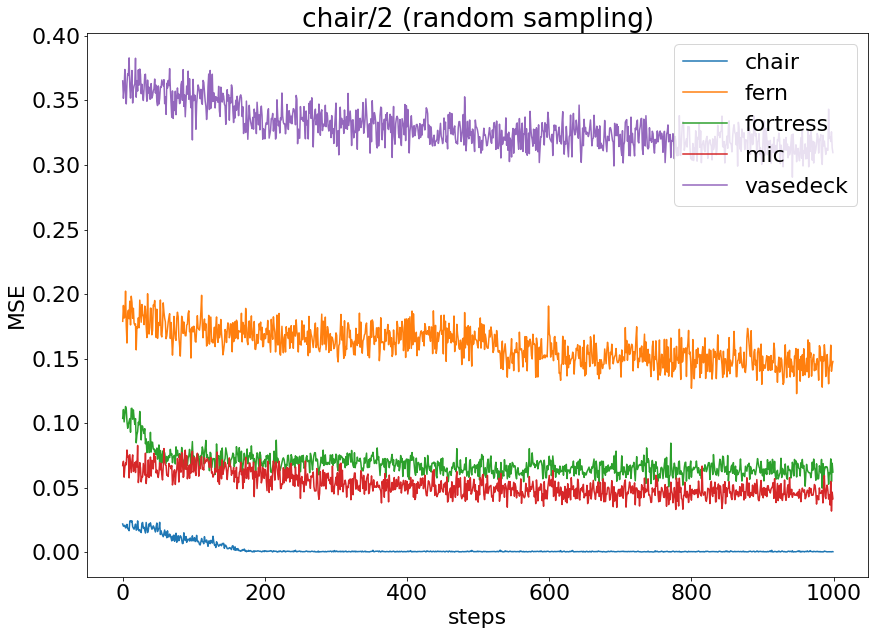

In [4]:
font = {'family' : 'DejaVu Sans',
        'size'   : 22}

plt.rc('font', **font)
plt.figure(figsize=(14,10))
for model in models:
    plt.plot(models[model], label=model)
plt.title(f'{test_img_name}/{obs_img_num} ({sampling_strategy} sampling)')
plt.xlabel('steps')
plt.ylabel('MSE')
plt.legend(loc=1)
plt.show()

# Generate configs

In [4]:
# Generate config
sampling_strategy = 'random'
test_img_name = 'chair'
obs_img_num = 2

# delete old cfgs
for cfg_path in glob('./configs/test_mse/*.txt'):
    os.remove(cfg_path)

# create new cfgs
for i, model in enumerate(glob(f'./ckpts//*.tar')):
    model_name = os.path.basename(model)[:-4]

    cfg = f"""model_name = {model_name}
test_img_name = {test_img_name}
output_dir = ./output
dataset_type = blender
data_dir = ./data/nerf_synthetic/
ckpt_dir = ./ckpts

use_viewdirs = True
white_bkgd = True
N_samples = 64
N_importance = 64
half_res = True

obs_img_num = {obs_img_num}
dil_iter = 3
kernel_size = 5
batch_size = 512
lrate = 0.01
sampling_strategy = {sampling_strategy}

delta_phi = 20.
delta_theta = 10.
delta_psi = 0.
delta_t = 0.

noise = None
sigma = 0.01
amount = 0.8
delta_brightness = 0.
"""
    with open(os.path.join('./configs/test_mse', f'{i}.txt'), 'w') as f:
        f.write(cfg)


# Run all

In [3]:
# run all
for cfg_path in glob('./configs/test_mse/*.txt'):
    print(f'Run "{cfg_path}"...')
    os.system(f'/home/bethge/ahochlehnert48/.conda/envs/inerf/bin/python run.py --config {cfg_path} > /dev/null')
    print('Done.')

Run "./configs/test_mse/0.txt"...
